In [1]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# 教師あり学習・分類の例
## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data # 特徴量データ
y_iris = iris.target # ラベルデータ

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1, stratify=y_iris)

# ロジスティック回帰モデル：solver引数には最適化手法を指定
model = LogisticRegression(solver='lbfgs')

model.fit(X_train, y_train) # モデルを訓練データに適合
y_pred = model.predict(X_test) # テストデータでラベルを予測
accuracy_score(y_test, y_pred) # 予測精度（accuracy）の評価

0.9777777777777777

### 練習
アイリスデータセットの2つの特徴量、petal_length と petal_width、から2つの花の種類、versicolor か virginica、を予測するモデルをロジスティック回帰を用いて学習し、その予測精度を評価してください。以下では pandas データフレームの values 属性を用いてNumPy配列を取得しています。

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = pd.read_csv('iris.csv')
iris2 = iris[(iris['species']=='versicolor')|(iris['species']=='virginica')]
X_iris = iris2[['petal_length','petal_width']].values
y_iris=iris2['species'].values

###  your code here
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1, stratify=y_iris)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9666666666666667

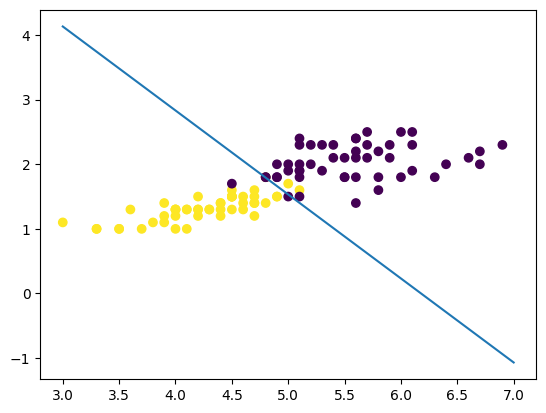

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w2 = model.coef_[0,1]
w1 = model.coef_[0,0]
w0 = model.intercept_[0]

line=np.linspace(3,7)
plt.plot(line, -(w1*line+w0)/w2)
y_c = (y_iris=='versicolor').astype(int)
plt.scatter(iris2['petal_length'],iris2['petal_width'],c=y_c);

# 教師あり学習・回帰の例
## Linear Regression

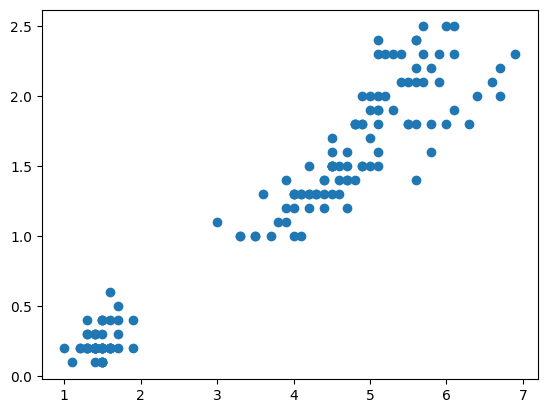

In [11]:
iris = pd.read_csv('iris.csv')
X=iris[['petal_length']].values
y=iris['petal_width'].values
plt.scatter(X,y);

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model=LinearRegression() # 線形回帰モデル
model.fit(X_train,y_train) # モデルを訓練データに適合
y_predicted=model.predict(X_test) # テストデータで予測
mean_squared_error(y_test,y_predicted) # 予測精度（平均二乗誤差）の評価

0.03974445760904272

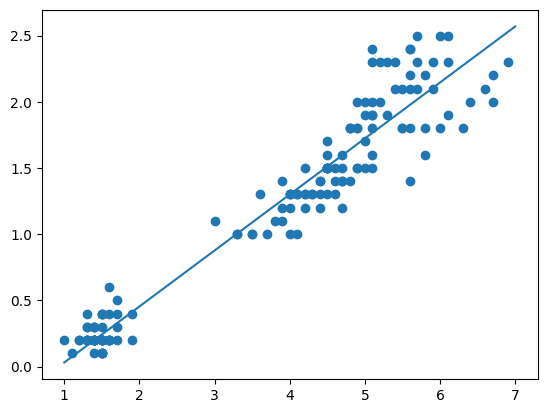

In [13]:
x_plot=np.linspace(1,7)
X_plot=x_plot[:,np.newaxis]
y_plot=model.predict(X_plot)
plt.scatter(X,y)
plt.plot(x_plot,y_plot);


## 教師なし学習・クラスタリングの例
### KMeans

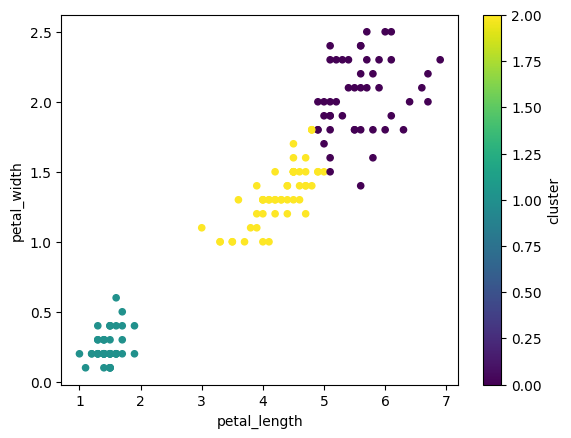

In [14]:
from sklearn.cluster import KMeans

iris = pd.read_csv('iris.csv')
X_iris=iris[['petal_length', 'petal_width']].values

model = KMeans(n_clusters=3) # k-meansモデル
model.fit(X_iris) # モデルをデータに適合
y_km=model.predict(X_iris) # クラスタを予測

iris['cluster']=y_km
iris.plot.scatter(x='petal_length', y='petal_width', c='cluster', colormap='viridis');

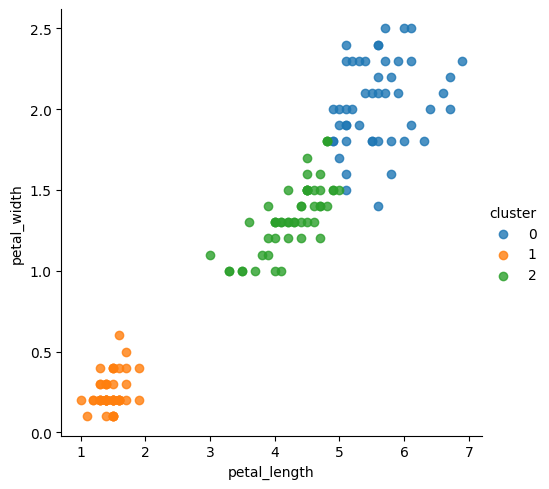

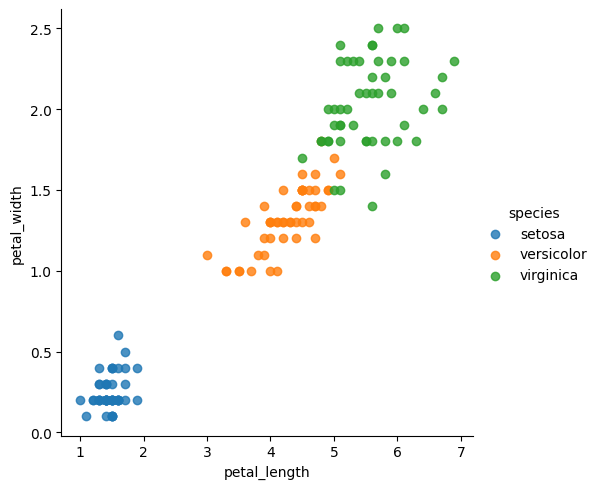

In [15]:
import seaborn as sns
sns.lmplot(x='petal_length',y='petal_width',hue='cluster',data=iris,fit_reg=False);
sns.lmplot(x='petal_length',y='petal_width',hue='species',data=iris,fit_reg=False);


### 練習

アイリスデータセットの2つの特徴量、sepal_length と sepal_width、を元に、KMeans モデルを用いて花のデータをクラスタリングしてください。クラスタの数は任意に設定してください。


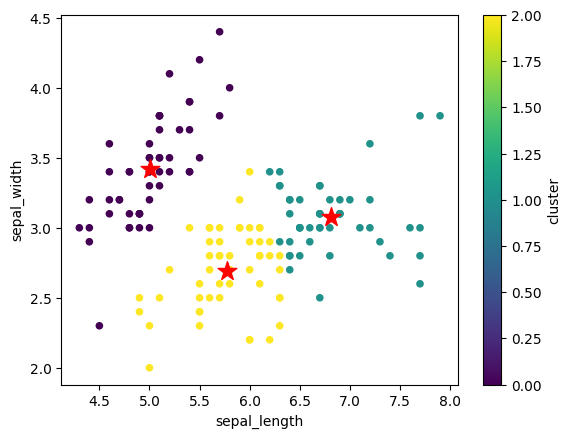

In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.csv')
X_iris=iris[['sepal_length', 'sepal_width']].values

### your code here
mode = KMeans(n_clusters=3, random_state=0)
model.fit(X_iris)
y_km = model.predict(X_iris)
centers = model.cluster_centers_ # クラスタ中心の座標を取得

iris['cluster'] = y_km
iris.plot.scatter(x='sepal_length', y='sepal_width', c='cluster', colormap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red') # クラスタ中心を星印でプロット
